# **Statistiques descriptives**

Dans un premier temps, pour bien nous familiariser avec la base et mieux comprendre comment elle est composée, nous allons nous intéresser à certaines métriques générale de la base, avant de l'analyser plus spécifiquement.

In [1]:
#installer worldcloud et matplotlib 
!pip install wordcloud 
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 25.9 MB/s eta 0:00:00


In [2]:
#Imports 
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast
from collections import Counter
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Pour corriger certaines imperfections de notre base quand nous la chargeons, et pour alléger le code par la suite, nous définissons une fonction qui charge la base en enlevant les redondances et en reformatant bien les colonnes posant problèmes.

In [13]:
def fonction_charge(path) :
    df1 = pd.read_csv(path)
    df_f = df1.drop_duplicates()
    df_f['release_date'] = pd.to_datetime(df_f['release_date'])
    # De la même façon on convertit la colonne 'budget' qui est composée de chaînes de caractères et non de valeurs numériques
    df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
    df_f['genres_list'] = df_f['genres_list'].apply(ast.literal_eval)
    df_f['countries_prod'] = df_f['countries_prod'].apply(ast.literal_eval)
    df_f['languages_list'] = df_f['languages_list'].apply(ast.literal_eval)
    df_f['prod_companies'] = df_f['prod_companies'].apply(ast.literal_eval)
    return df_f 

In [15]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df.columns
#L'importation s'est bien passée

/tmp/ipykernel_1696/844323040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_1696/844323040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_1696/844323040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'tagline', 'title', 'vote_average', 'vote_count',
       'directors', 'collection_name', 'genres_list', 'countries_prod',
       'languages_list', 'prod_companies', 'Award_mains', 'Mains_cat',
       'Award_fest', 'Fest_cat'],
      dtype='object')

## **Les nuages de mots pour étudier l'occurence de genres**

### **Dans toute la base TMDB**
Nous allons essayer de produire les nuages de mots pour observer quels sont les genres de films les plus présents dans notre base. 
Pour ce faire, nous devons d'abord transformer la colonne 'genres_list' de notre base en chaîne de caractères avec des mots séparés par les espaces, puis le concatener en un seul texte. 

In [21]:
df1 = df
df1['genres_str'] = df1['genres_list'].apply(lambda x: ' '.join(x))

# Convertir la colonne 'genres_str' en chaîne de caractères
df1['genres_str'] = df1['genres_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_global = ' '.join(df1['genres_str'])


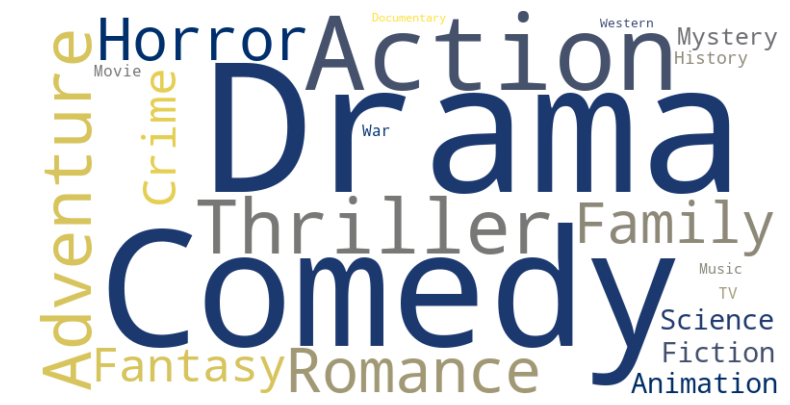

In [22]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_global)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

Clairement, nous pouvons voir que les genres comme Drama, Comedy et Action prévalent dans notre dataset. Qu'en est-il réellement? Nous allons le voir grâce à l'histogramme de l'occurrence des mots

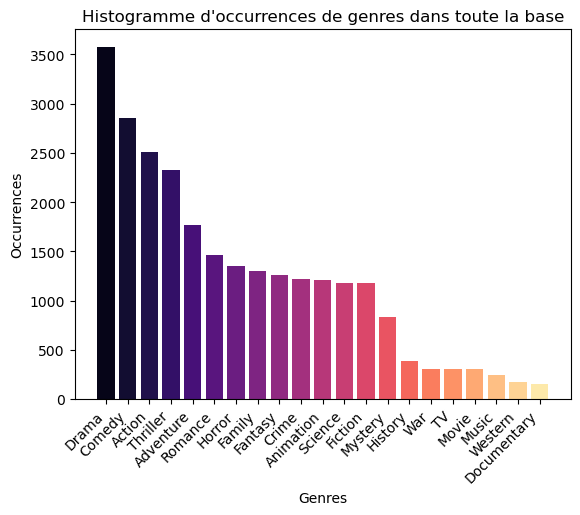

In [23]:
#Pour le bar chart 
genre_counts = Counter(genres_global.split())

# Créer un graphique à barres
genres = list(genre_counts.keys())
occurrences = list(genre_counts.values())
#trier par ordre decroissant pour plus de lisibilité 
genres, occurrences = zip(*sorted(zip(genres, occurrences), key=lambda x: x[1], reverse=True))
#Rajouter des belles couleurs et faire un gradient 
colors = sns.color_palette("magma", n_colors=len(genres))

#afficher le graphe

plt.bar(genres, occurrences, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrences de genres dans toute la base")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Parmi les films nominés dans les compétitions cinématographiques mainstream (Oscar, César)**
Nous allons réproduire cette expérience ensuite en regardant de près les mêmes informations mais pour les films nominés pour les compétitions telles que Oscar et César. 

In [25]:
df1['genres_mains'] = df1.apply(lambda row: row['genres_list'] if row['Award_mains'] == 1 else None, axis=1)

mains = df1[df1['genres_mains'].notnull()]

mains['genres_mains_str'] = mains['genres_mains'].apply(lambda x: ' '.join(x))

# Convertir la colonne 'genres_str' en chaîne de caractères
mains['genres_mains_str'] = mains['genres_mains_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_mains= ' '.join(mains['genres_mains_str'] )


/tmp/ipykernel_1696/3540995963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mains['genres_mains_str'] = mains['genres_mains'].apply(lambda x: ' '.join(x))
/tmp/ipykernel_1696/3540995963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mains['genres_mains_str'] = mains['genres_mains_str'].astype(str)


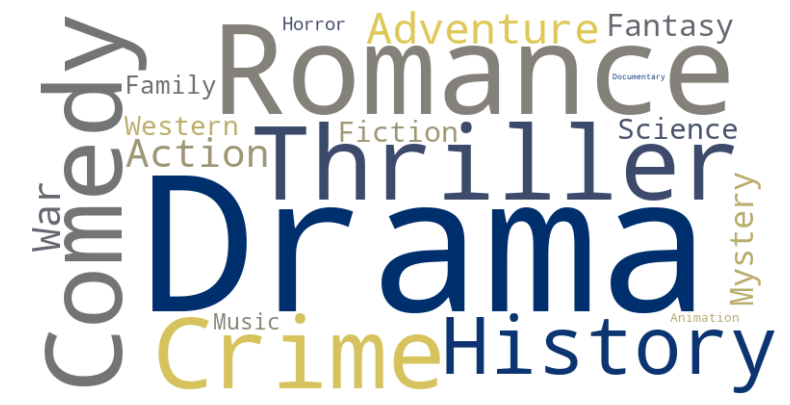

In [26]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_mains)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

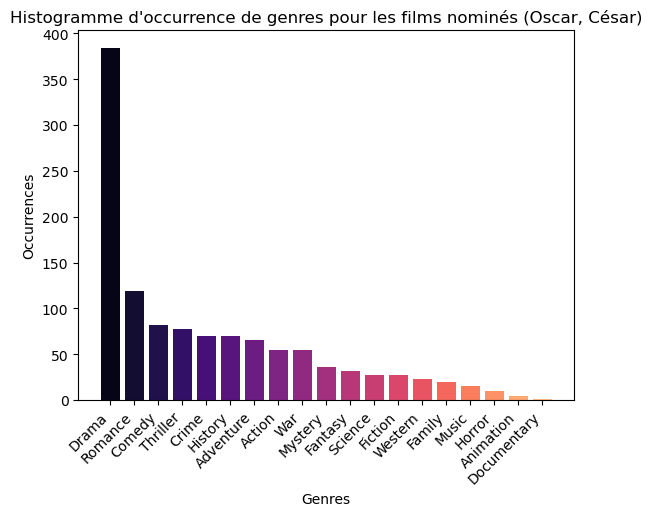

In [27]:
#Histogramme 
genre_mains_ct = Counter(genres_mains.split())

# Créer un graphique à barres
genres_m = list(genre_mains_ct.keys())
occurrences_m = list(genre_mains_ct.values())
#trier par ordre decroissant pour plus de lisibilité 
genres_m, occurrences_m = zip(*sorted(zip(genres_m, occurrences_m), key=lambda x: x[1], reverse=True))

#afficher le graphe

plt.bar(genres_m, occurrences_m, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrence de genres pour les films nominés (Oscar, César)")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Parmi les films nominés dans les festivals cinématographiques (Cannes, Venise)**
Nous allons également analyser et comparer l'occurrence des genres de cinéma parmi les films nominés dans les compétitions telles que le Festival de Cannes et le Festival de Venise.

In [28]:
df1['genres_fest'] = df1.apply(lambda row: row['genres_list'] if row['Award_fest'] == 1 else None, axis=1)

fest = df1[df1['genres_fest'].notnull()]

fest['genres_fest_str'] = fest['genres_fest'].apply(lambda x: ' '.join(x))

# Convertir la colonne 'genres_str' en chaîne de caractères
fest['genres_fest_str'] = fest['genres_fest_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_fest= ' '.join(fest['genres_fest_str'] )


/tmp/ipykernel_1696/680207540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fest['genres_fest_str'] = fest['genres_fest'].apply(lambda x: ' '.join(x))
/tmp/ipykernel_1696/680207540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fest['genres_fest_str'] = fest['genres_fest_str'].astype(str)


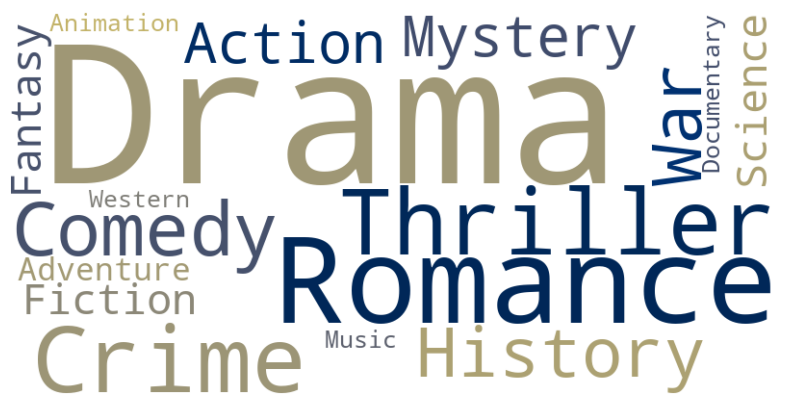

In [29]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_fest)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

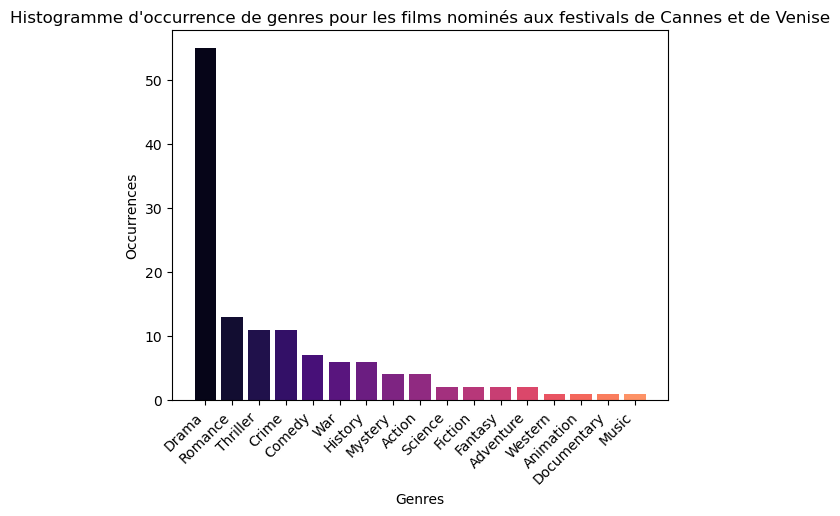

In [30]:
#Histogramme 
genre_fest_ct = Counter(genres_fest.split())

# Créer un graphique à barres
genres_f = list(genre_fest_ct.keys())
occurrences_f = list(genre_fest_ct.values())
#trier par ordre decroissant pour plus de lisibilité 
genres_f, occurrences_f = zip(*sorted(zip(genres_f, occurrences_f), key=lambda x: x[1], reverse=True))

#afficher le graphe

plt.bar(genres_f, occurrences_f, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrence de genres pour les films nominés aux festivals de Cannes et de Venise")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Conclusions et limites** 

Nous pouvons observer que le genre de drame reste assez sur-representé que ce soit pour la base toute entière ou pour les films nominés dans l'une des catégories aux récompenses 'mainstream' ou aux festivals. Cela pourrait être dû à la définition floue de ce genre qui permet d'englober un grand nombre de films. EN ce qui concerne les genres les plus representés parmi les nominations, on observe des différences assez notables entre les compétitions mainstream et les festivals. En effet, les derniers contiennet plus de films du genre thriller, crime, films de guerre et d'histoire. Pour les récompenses comme Oscars ou César, nous observons un plus grand nombre de films romance et les comédies qui arrivent en deuxième position juste après le drame. 

Notons aussi que notre analyse peut comporter des biais - en effet, nous n'avons pas étudié toutes les catégories dans lesquelles les films pourraient être nominés, et le nombre de films présents à la fois dans notre base récupérée grâce à l'API et grâce au scrapping reste faible, de l'ordre de 700 toute nomination confondue. Il est donc difficile à le généraliser à toutes les nominations ou compétitions cinématographique, mais étant donné les contraintes techniques pour notre cas (la contrainte de temps, et la difficulté de nettoyage des données scrappées sur Wikipédia), ces résultats restent intéressants pour notre analyse et la construction de l'algorithme de recommendation. 
